# **Studi Kasus Diabetic Retinopathy**

Implementasi dengan menggunakan `Naive Bayes` dan `K-NN`

## Membaca dan Mengelolah data

In [675]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

data = arff.loadarff('/content/drive/MyDrive/datamining/tugas/messidor_features.arff')
df = pd.DataFrame(data[0])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


### Label encoder

Mengubah Label dari string ke angka, misal `b'0'` ke `0`

**`Sebelum` berubah**

In [676]:
y = df['Class'].values
y[0:5]

array([b'0', b'0', b'1', b'0', b'1'], dtype=object)

**`Sesudah` berubah**

In [677]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

### Mengubah colom

Dari Angka ke Pembilang

In [678]:
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

In [679]:
df.columns = [col_names]
df['label'] = y
df

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,0
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,0
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,0
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,1


In [680]:
X = df.drop(columns=['label'])
X

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0


## Normalisasi Pada data

Proses Normalisasi data menggunakan normalisasi `Min - Max`

Perhitungan normalisasi menggunakan
**Rumus Probabilitas :**
> $X_{new} = \frac{X - X_{min}}{X{max} - X{min}}$

```
  ket:
  X  = Data
  Xmin = Nilai terkecil dari satu kolom baris data
  Xmax = Nilai terbesar dari satu kolom baris data
```

In [681]:

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
features_names = X.columns.copy()
scaled_features = pd.DataFrame(scaled, columns=features_names)
scaled_features.head(10)

# SAVE FILE HASIL SCALER
# scaler_filename = "scaled.save"
# joblib.dump(scaler, scaler_filename) 
# scaler = joblib.load(scaler_filename)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0
5,1.0,1.0,0.286667,0.320611,0.336134,0.384615,0.375000,0.318182,0.069395,0.041498,0.021738,0.005417,0.000000,0.000000,0.000000,0.000000,0.601764,0.426770,0.0
6,1.0,0.0,0.186667,0.213740,0.235294,0.250000,0.250000,0.170455,0.037412,0.054531,0.015400,0.000000,0.000000,0.000000,0.000000,0.000000,0.775126,0.506339,0.0
7,1.0,1.0,0.033333,0.038168,0.042017,0.048077,0.010417,0.000000,0.050374,0.056828,0.011536,0.002516,0.000000,0.000000,0.000000,0.000000,0.929166,0.081622,1.0
8,1.0,1.0,0.140000,0.152672,0.142857,0.134615,0.125000,0.102273,0.164381,0.140880,0.057991,0.008305,0.000000,0.000000,0.000000,0.000000,0.589477,0.365093,0.0
9,1.0,1.0,0.520000,0.564885,0.605042,0.673077,0.656250,0.522727,0.053997,0.060159,0.008246,0.001670,0.000455,0.000000,0.000000,0.000000,0.860738,0.317608,0.0


## Data Baru

Lalu label yang sudah dirubah selanjutnya dimasukkan pada data, sehingga tercipta dataframe yang baru

In [682]:
scaled_features['label'] = y
scaled_features

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0,0
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0,0
2,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0,1
3,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0,0
4,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,0.220000,0.251908,0.277311,0.307692,0.312500,0.261364,0.014179,0.005609,0.000294,0.000052,0.000000,0.000000,0.000000,0.000000,0.756089,0.365106,0.0,0
1147,1.0,1.0,0.320000,0.366412,0.403361,0.461538,0.458333,0.409091,0.155722,0.163809,0.076060,0.016390,0.000030,0.000000,0.000000,0.000000,0.663701,0.410954,0.0,0
1148,1.0,0.0,0.320000,0.358779,0.394958,0.423077,0.437500,0.363636,0.074612,0.083569,0.016624,0.002307,0.000218,0.000000,0.000000,0.000000,0.859281,0.446002,0.0,0
1149,1.0,1.0,0.253333,0.267176,0.235294,0.211538,0.125000,0.068182,0.099548,0.075419,0.044696,0.018030,0.010958,0.016263,0.040346,0.056559,0.526653,0.302456,1.0,1


## GaussianNB

### **PROSES PADA NAIVE BAYES MENGGUNAKAN DATA YANG `SUDAH` DI NORMALISASI**

### Persiapan Libary

Pada tahap dibawah dilakukan split data train dengan nilai `0.2` , serta dilakukan prediksi dan menghitung probalitas

In [683]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


X_train, X_test = train_test_split(scaled, train_size = 0.8, test_size = 0.2, shuffle=False)
y_train, y_test = train_test_split(y, train_size = 0.8, test_size = 0.2, shuffle=False)

clf2 = GaussianNB()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
probas = clf2.predict_proba(X_test)[:,1]
y_test.shape + probas.shape

(231, 231)

### Hasil Perhitungan Probabilitas

Perhitungan diatas menggunakan 
**Rumus Probabilitas :**
> P(A) = $\frac{n(A)}{n(S)}$

```
  ket:
  P(A)  = Peluang suatu kejadian "A"
  n(A) = Banyak kejadian yang diinginkan
  n(S) = Jumlah total kejadian sample
```

In [684]:
probas

array([0.75620474, 0.11189161, 1.        , 0.10486252, 0.14252695,
       1.        , 0.87186459, 0.08938164, 0.06195771, 0.07016774,
       1.        , 0.07309769, 0.99377827, 0.08398282, 0.99999961,
       0.85347824, 0.91850879, 0.07858852, 0.64476537, 0.21435453,
       0.09334844, 0.9769378 , 0.95011339, 0.68211181, 0.96900188,
       0.99890913, 0.99724613, 0.16434853, 0.86018358, 0.99999363,
       0.53634466, 0.08895374, 0.98313892, 0.29158109, 0.25465845,
       1.        , 0.42762289, 0.88627287, 0.48478246, 0.68057536,
       0.09285228, 0.92485924, 0.12602622, 0.99996256, 0.67208144,
       0.95535994, 0.08212779, 0.92138625, 0.14110054, 0.29346465,
       0.99957587, 0.09783595, 0.07974339, 0.63233074, 0.2814182 ,
       1.        , 0.14248748, 1.        , 1.        , 0.99977481,
       0.94905966, 0.32335402, 0.66732001, 0.98470723, 0.99924866,
       0.91560627, 0.09860317, 0.99956381, 0.13165869, 0.93304628,
       1.        , 0.1097288 , 0.336975  , 0.67880805, 0.07551

### Pembulatan

Pembulatan menjadi `0` dan `1` dari hasil probabilitas diatas

In [685]:
probas = probas.round()
probas

array([1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1.

In [686]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

### Menghitung hasil Akhir

Menghitung `precision_score` , `accuracy_score` , `recall_score` , `f1_score`

In [687]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
precision = round(precision_score(y_test,y_pred, average="macro")*100,2)
acc_nb = round(accuracy_score(y_test,y_pred)*100,2)
recall = round(recall_score(y_test,y_pred, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc_nb))

Konfusi Matrix
 [[65 50]
 [34 82]]
precision: 63.89
recall: 63.61
fscore: 63.44
accuracy: 63.64


### **PROSES PADA NAIVE BAYES MENGGUNAKAN DATA YANG `BELUM` DI NORMALISASI**

### Persiapan Libary

Menghitung Probabilitas

In [688]:
X_train_2, X_test_2 = train_test_split(X, train_size = 0.8, test_size = 0.2, shuffle=False)
y_train_2, y_test_2 = train_test_split(y, train_size = 0.8, test_size = 0.2, shuffle=False)

nb = GaussianNB()
nb.fit(X_train_2, y_train_2)
y_pred_2 = nb.predict(X_test_2)
probas_2 = nb.predict_proba(X_test_2)[:,1]
y_test_2.shape + probas.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(231, 231)

### Hasil dari perhitungan Probabilitas

In [689]:
probas_2

array([2.44675761e-02, 1.01773885e-03, 1.00000000e+00, 9.47815666e-04,
       1.34612803e-03, 1.00000000e+00, 5.22355851e-02, 7.94813794e-04,
       5.35188240e-04, 6.11399680e-04, 9.99999432e-01, 6.38903416e-04,
       5.64178101e-01, 7.40947996e-04, 9.99951663e-01, 4.50590733e-02,
       8.34303868e-02, 6.90239788e-04, 1.44660822e-02, 2.17747148e-03,
       8.32397496e-04, 2.55027023e-01, 1.33668119e-01, 1.70935484e-02,
       2.02105520e-01, 8.81208832e-01, 7.45754095e-01, 1.58269133e-03,
       4.74006385e-02, 9.99098165e-01, 9.29907570e-03, 7.90665894e-04,
       3.20652663e-01, 3.32866709e-03, 2.76083452e-03, 1.00000000e+00,
       5.96968366e-03, 5.94110417e-02, 7.56560778e-03, 1.69729481e-02,
       8.27793664e-04, 9.03347700e-02, 1.16745907e-03, 9.95375504e-01,
       1.63561902e-02, 1.47791344e-01, 7.24905010e-04, 8.67967501e-02,
       1.32947541e-03, 3.35089635e-03, 9.50193633e-01, 8.78572937e-04,
       7.01652166e-04, 1.37358778e-02, 3.14435173e-03, 9.99999999e-01,
      

In [690]:
probas_2 = probas_2.round()
probas_2

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1.

In [691]:
y_test_2

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

### Mencari Hasil Akhir

In [692]:
cm_2 = confusion_matrix(y_test_2,probas_2)
precision_2 = round(precision_score(y_test_2,probas_2, average="macro")*100,2)
acc_nb_2 = round(accuracy_score(y_test_2,probas_2)*100,2)
recall_2 = round(recall_score(y_test_2,probas_2, average="macro")*100,2)
f1score_2 = round(f1_score(y_test_2, probas_2, average="macro")*100,2)
print('Konfusi Matrix\n',cm_2)
print('precision: {}'.format(precision_2))
print('recall: {}'.format(recall_2))
print('fscore: {}'.format(f1score_2))
print('accuracy: {}'.format(acc_nb_2))

Konfusi Matrix
 [[102  13]
 [ 69  47]]
precision: 68.99
recall: 64.61
fscore: 62.37
accuracy: 64.5


## K - NN

### **PROSES PADA K-NN MENGGUNAKAN DATA YANG `BELUM` DI NORMALISASI**

### Cara Kerja Algoritma K-Nearest Neighbor

### Menentukan nilai K

Nilai k pada algoritma KNN mendefinisikan berapa banyak tetangga yang akan diperiksa untuk menentukan klasifikasi titik kueri tertentu. Misalnya, jika **k=1**, instance akan ditugaskan ke kelas yang sama dengan tetangga terdekatnya. 

### Menghitung Jarak Data

Hitung jarak dari jumlah tetangga K (bisa menggunakan salah satu metrik jarak, misalnya Euclidean distance)

**Rumus :**
> $d(x,y) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

### Mengurutkan jarak

Setelah berhasil menghitung semua jarak pada data latih dengan data uji, maka urutkan semua jarak yang sudah di dapat dari yang terkecil sampai terbesar

### Ambil Tetangga Terdekat K

Ambil tetangga terdekat K sesuai jarak yang dihitung.

### Tentukan Mayoritas

Dari data tetangga yang sudah di ambil berdasarkan K, tentukan kategori mayoritas yang ada. Maka dari itu, data uji tersebut merupakan tetangga dari data mayoritas tersebut.

### Split Data

Pada kasus ini, membagi data menjadi set pelatihan dan pengujian (80:20) %

**Rumus :**
> Jumlah data uji : $\frac{persentase data uji}{100} jumlah data$


In [693]:
X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(X,y,test_size=0.2,random_state=4)
#shape of train and test objects
print(X_train_knn.shape)
print(X_test_knn.shape)

(920, 19)
(231, 19)


### Mencari Akurasi dengan K = 1 sampai 25

mencari akurasi yang lebih besar dengan data latih dan data uji yang sudah di split di atas. Namun sebelum menghitung akurasi, pada proses ini juga sudah menghitung jarak antar data sehingga dapat mengghitung akurasi.

Terdapat proses menghitung jarak

**Rumus :**
> $d(x,y) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

In [694]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_knn,y_train_knn)
        y_pred_knn=knn.predict(X_test_knn)
        scores[k] = metrics.accuracy_score(y_test_knn,y_pred_knn)
        scores_list.append(metrics.accuracy_score(y_test_knn,y_pred_knn))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [695]:
scores_list

[0.6536796536796536,
 0.6233766233766234,
 0.6666666666666666,
 0.6406926406926406,
 0.6277056277056277,
 0.6536796536796536,
 0.6493506493506493,
 0.6493506493506493,
 0.6493506493506493,
 0.658008658008658,
 0.670995670995671,
 0.6623376623376623,
 0.6536796536796536,
 0.658008658008658,
 0.6536796536796536,
 0.670995670995671,
 0.658008658008658,
 0.6493506493506493,
 0.6493506493506493,
 0.6363636363636364,
 0.6406926406926406,
 0.658008658008658,
 0.6493506493506493,
 0.6536796536796536,
 0.645021645021645]

### Visualisasi Hasil Akurasi

Menggunakan matplotlib

Text(0, 0.5, 'Testing Accuracy')

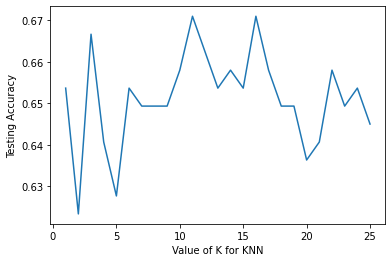

In [696]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Menghitung N satuan

In [697]:
knn = KNeighborsClassifier(n_neighbors = 5)

Fitting the kNN Model

In [698]:
knn.fit(X_train_knn,y_train_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier()

Predict the test set *Result*

In [699]:
yy_pred = knn.predict(X_test_knn)
yy_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1])

the final result

In [700]:
cm_knn = confusion_matrix(y_test_knn,yy_pred)
precision_knn = round(precision_score(y_test_knn,yy_pred, average="macro")*100,2)
acc_nb_knn = round(accuracy_score(y_test_knn,yy_pred)*100,2)
recall_knn = round(recall_score(y_test_knn,yy_pred, average="macro")*100,2)
f1score_knn = round(f1_score(y_test_knn, yy_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm_knn)
print('precision: {}'.format(precision_knn))
print('recall: {}'.format(recall_knn))
print('fscore: {}'.format(f1score_knn))
print('accuracy: {}'.format(acc_nb_knn))

Konfusi Matrix
 [[78 31]
 [55 67]]
precision: 63.51
recall: 63.24
fscore: 62.69
accuracy: 62.77


### **PROSES PADA K-NN MENGGUNAKAN DATA YANG `SUDAH` DI NORMALISASI**

### Split Data

In [701]:
X_train_knn2,X_test_knn2,y_train_knn2,y_test_knn2 = train_test_split(scaled,y,test_size=0.2,random_state=4)
#shape of train and test objects
print(X_train_knn2.shape)
print(X_test_knn2.shape)

(920, 19)
(231, 19)


### Mencari Akurasi dengan K = 1 sampai 25

mencari akurasi yang lebih besar dengan data latih dan data uji yang sudah di split di atas. Namun sebelum menghitung akurasi, pada proses ini juga sudah menghitung jarak antar data sehingga dapat mengghitung akurasi.

In [702]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_knn2,y_train_knn2)
        y_pred_knn2=knn.predict(X_test_knn2)
        scores[k] = metrics.accuracy_score(y_test_knn2,y_pred_knn2)
        scores_list.append(metrics.accuracy_score(y_test_knn2,y_pred_knn2))


In [703]:
scores_list

[0.6017316017316018,
 0.5800865800865801,
 0.5930735930735931,
 0.6103896103896104,
 0.6277056277056277,
 0.6623376623376623,
 0.6666666666666666,
 0.6753246753246753,
 0.6277056277056277,
 0.6190476190476191,
 0.6233766233766234,
 0.6320346320346321,
 0.658008658008658,
 0.6277056277056277,
 0.658008658008658,
 0.6493506493506493,
 0.6666666666666666,
 0.670995670995671,
 0.683982683982684,
 0.6753246753246753,
 0.6883116883116883,
 0.6883116883116883,
 0.6623376623376623,
 0.6753246753246753,
 0.670995670995671]

### Visualisasi Hasil Akurasi

Menggunakan matplotlib

Text(0, 0.5, 'Testing Accuracy')

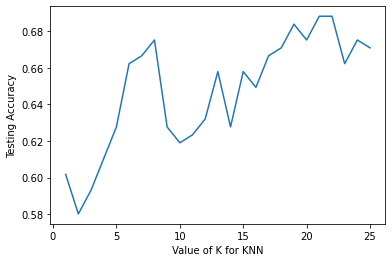

In [704]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Menghitung N satuan

In [705]:
knn = KNeighborsClassifier(n_neighbors = 5)

Fitting the kNN Model

In [706]:
knn.fit(X_train_knn2,y_train_knn2)

KNeighborsClassifier()

Predict the test set *Result*

In [707]:
yy_pred2 = knn.predict(X_test_knn2)
yy_pred2

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

the final result

In [709]:
cm_knn2 = confusion_matrix(y_test_knn2,yy_pred2)
precision_knn2 = round(precision_score(y_test_knn2,yy_pred2, average="macro")*100,2)
acc_nb_knn2 = round(accuracy_score(y_test_knn2,yy_pred2)*100,2)
recall_knn2 = round(recall_score(y_test_knn2,yy_pred2, average="macro")*100,2)
f1score_knn2 = round(f1_score(y_test_knn2, yy_pred2, average="macro")*100,2)
print('Konfusi Matrix\n',cm_knn2)
print('precision: {}'.format(precision_knn2))
print('recall: {}'.format(recall_knn2))
print('fscore: {}'.format(f1score_knn2))
print('accuracy: {}'.format(acc_nb_knn2))

Konfusi Matrix
 [[74 35]
 [51 71]]
precision: 63.09
recall: 63.04
fscore: 62.76
accuracy: 62.77
